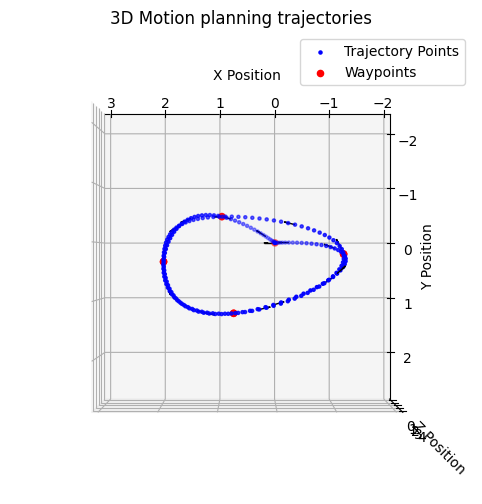

In [1]:
import os
import sys

# 将上一级目录添加到 sys.path
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

import tools
import pandas as pd


cm = 0.01
HOVER_HEIGHT  = 60*cm  
Trajectory = tools.Trajectory_Class('../../position_records.csv')

from planning import MotionPlanner3D
Planner = MotionPlanner3D(Gate_points = Trajectory.point_list,
                          time_gain = 3.0, #FF0000
                          DEBUG = 0)



# print(Planner.result_traj_vel_max)
# test_planner.plot_continuous(None, test_planner.waypoints, test_planner.trajectory_setpoints)
Planner.plot_discrete(None, Planner.waypoints, Planner.trajectory_setpoints)



210
None


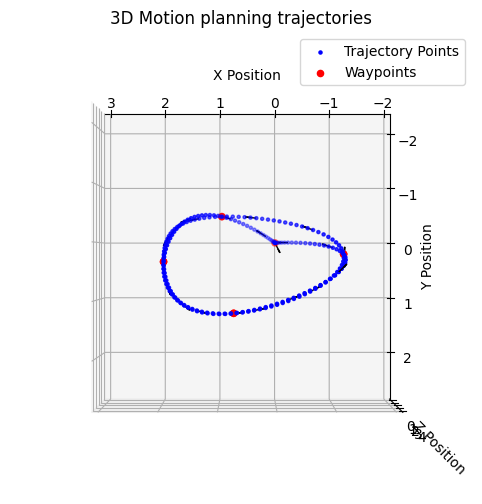

In [2]:
import os
import sys

# 将上一级目录添加到 sys.path
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

import tools
import pandas as pd
from planning import MotionPlanner3D


cm = 0.01
HOVER_HEIGHT  = 60*cm  
Trajectory = tools.Trajectory_Class('../../position_records.csv')

Planner = MotionPlanner3D(Gate_points = Trajectory.point_list,
                               time_gain = 1.5, #FF0000
                               DEBUG = 0)

print(len(Planner.trajectory_setpoints))
print(Planner.result_traj_vel_max)
# test_planner.plot_continuous(None, test_planner.waypoints, test_planner.trajectory_setpoints)
Planner.plot_discrete(None, Planner.waypoints, Planner.trajectory_setpoints)

Total flying time:  15.0
Max velocity:  None


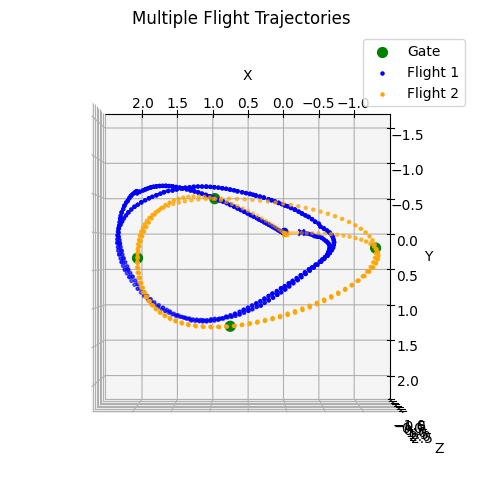

In [3]:
import os
import sys
import numpy as np
import pandas as pd

# 将上一级目录添加到 sys.path
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)
import tools
import PLOT

from planning import MotionPlanner3D

cm = 0.01
HOVER_HEIGHT  = 60*cm  
Trajectory = tools.Trajectory_Class('../../position_records.csv')
Planner = MotionPlanner3D(Gate_points = Trajectory.point_list,
                            time_gain = 1.5, #FF0000
                            DEBUG = 0)

print("Total flying time: ",Planner.t_f)
print("Max velocity: ",Planner.result_traj_vel_max)

data_6 = PLOT.get_real_pos_list("../../flight_log_14_TimeBased.csv")
# PLOT.plot_multiple_flight_logs([data_1, data_2, data_3, test_planner.trajectory_setpoints])
PLOT.plot_multiple_flight_logs([data_6, 
                                Planner.trajectory_setpoints],
                                Trajectory.return_gate_points_array(),
                                type='discrete')

Total flying time:  20.0
Max velocity:  None


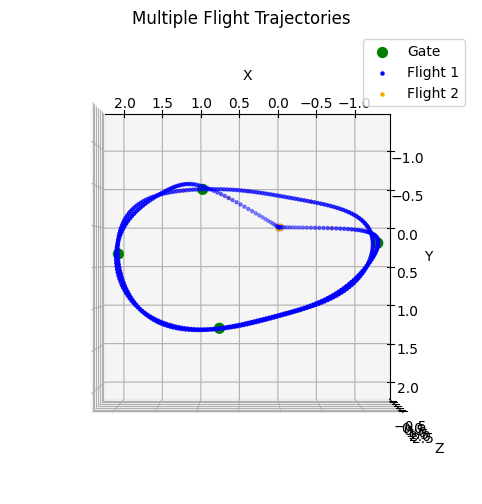

In [4]:
import os
import sys

# 将上一级目录添加到 sys.path
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)
import tools
import pandas as pd
import PLOT
import numpy as np

from planning import MotionPlanner3D

cm = 0.01
HOVER_HEIGHT  = 60*cm  
Trajectory = tools.Trajectory_Class('../../position_records.csv')
Planner = MotionPlanner3D(Gate_points = Trajectory.return_gate_points_list(), time_gain=2.0, DEBUG = 0)
Planner.resample_and_replan(distance=0.8) #FF0000
# Planner.resample_and_replan(distance=2.0) #FF0000

print("Total flying time: ",Planner.t_f)
print("Max velocity: ",Planner.result_traj_vel_max)

data_6 = PLOT.get_real_pos_list("../../flight_log_14_TimeBased.csv")
# PLOT.plot_multiple_flight_logs([data_1, data_2, data_3, test_planner.trajectory_setpoints])
PLOT.plot_multiple_flight_logs([
                                # data_6, 
                                Planner.trajectory_setpoints,
                                np.array(Planner.waypoints)],
                                np.array(Planner.Gate_points),
                                type='discrete')



210
None


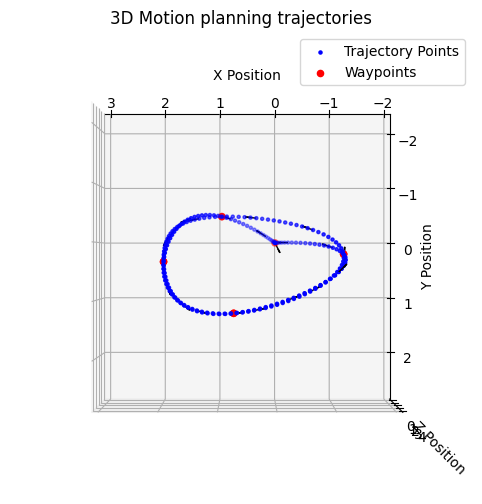

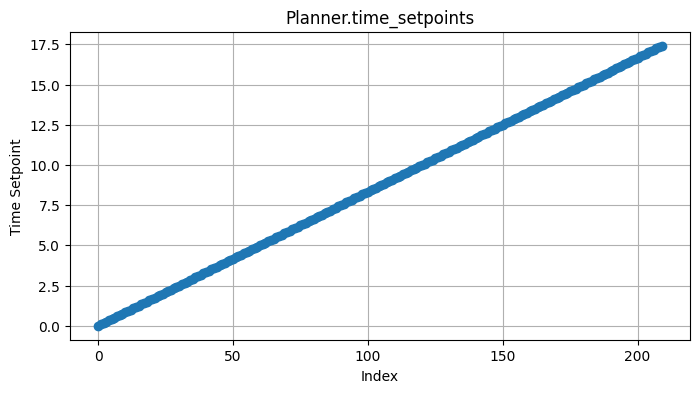

210
210
17.416666666666668
0.08333333333333334


In [5]:
import os
import sys

# 将上一级目录添加到 sys.path
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

import tools
import pandas as pd
from planning import MotionPlanner3D


cm = 0.01
HOVER_HEIGHT  = 60*cm  
Trajectory = tools.Trajectory_Class('../../position_records.csv')

Planner = MotionPlanner3D(Gate_points = Trajectory.point_list,
                               time_gain = 1.5, #FF0000
                               DEBUG = 0)

print(len(Planner.trajectory_setpoints))
print(Planner.result_traj_vel_max)
# test_planner.plot_continuous(None, test_planner.waypoints, test_planner.trajectory_setpoints)
Planner.plot_discrete(None, Planner.waypoints, Planner.trajectory_setpoints)

import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot(Planner.time_setpoints, marker='o')
plt.title('Planner.time_setpoints')
plt.xlabel('Index')
plt.ylabel('Time Setpoint')
plt.grid(True)
plt.show()

print(len(Planner.time_setpoints))
print(len(Planner.trajectory_setpoints))
print(Planner.time_setpoints[-1])
print(Planner.delta_t)
